# Import libraries and load data

In [2]:
import glob
import pylab as pl 
import pandas as pd 
import numpy as np 
import sys 
sys.path.insert(0, '/home/nicolas/hpchome/network_conditioning/codes/')


# Comparing simulations with USGS

In [3]:
usgs = pd.read_csv('../local_data/tables/usgs_final_linked.csv', dtype ={'index':str, 'LINKNO':str})
usgs.set_index('LINKNO', inplace = True)
usgs['index'] = ['0%s'%i for i in usgs['index']]

In [99]:
qs = pd.read_parquet('../local_data/ifis_config/proj1/sim_flows.gzip')
#qs = pd.read_parquet('../local_data/ifis_config/turkey/sim_flows.gzip')
#qs = pd.read_parquet('../local_data/ifis_config/waverly/sim_flows.gzip')
idx = usgs.index.intersection(qs.columns)
colnames = usgs.loc[qs[idx].columns, 'index'].to_dict()
qs.rename(columns=colnames, inplace = True)
#colnames = usgs.loc[qs.columns.astype(int), 'index']
# colnames.index = ['0%d'%i for i in colnames.index]
# qs.rename(columns=colnames, inplace = True)
qs.index = qs.index - pd.Timedelta('5h')

In [8]:
gauge = '06809500'
qo = pd.read_parquet('/home/nicolas/hpchome/2022_iowa_hd/processed/usgs/%s.gzip' % gauge)

In [9]:
qo.resample('A').max()

,00060
datetime,
2015-12-31 00:00:00+00:00,481.100000
2016-12-31 00:00:00+00:00,382.050000
2017-12-31 00:00:00+00:00,239.771750
2018-12-31 00:00:00+00:00,261.067500
2019-12-31 00:00:00+00:00,680.615000
2020-12-31 00:00:00+00:00,49.383500
2021-12-31 00:00:00+00:00,54.406750
2022-12-31 00:00:00+00:00,3.558725


<Axes: xlabel='datetime'>

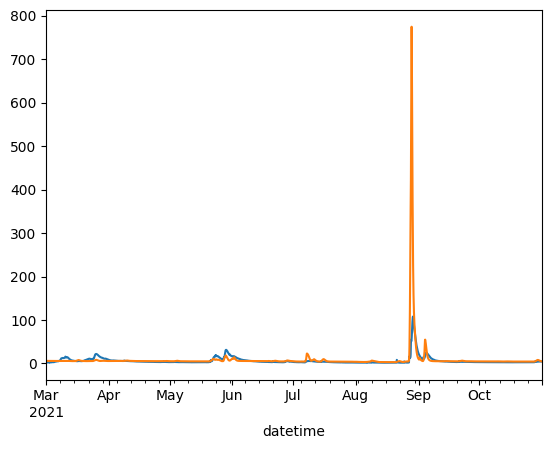

In [109]:
qo.loc['2021-03':'2021-10','00060'].plot()
qs.loc['2021-03':'2021-10',gauge].plot()


<Axes: xlabel='datetime'>

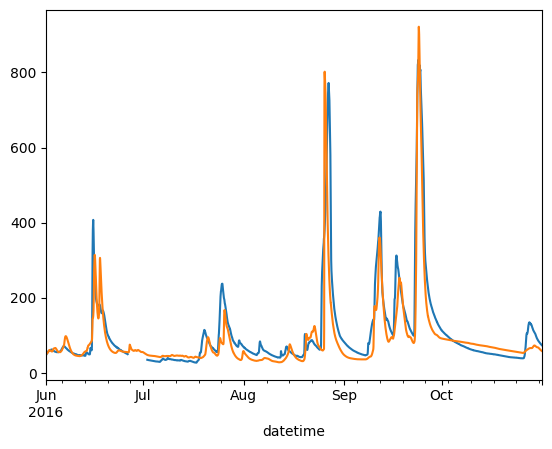

In [71]:
qo.loc['2016-06':'2016-10','00060'].plot()
qs.loc['2016-06':'2016-10',gauge].plot()


# Reading snapshots  (h5)

In [7]:
import h5py 

In [38]:
snaps = glob.glob('../local_data/ifis_config/waverly/states/*')
snaps.sort()

In [39]:
f = h5py.File(snaps[-1],'r')

In [40]:
f['snapshot'][:]['state_0']

array([2.28081343e+01, 2.28131763e+01, 2.11051234e-03, ...,
       2.16618906e-03, 1.45138528e-03, 9.74734829e-04])

In [45]:
g = open('../local_data/tables/temp_values.cvs','w')
g.write('lid,val\n')
for lid, val in zip(f['snapshot'][:]['link_id'], f['snapshot'][:]['state_3']):
    g.write('%d,%.3f\n' % (lid, val))
g.close()

array([1862015, 1861791,  152671, ...,  434418,  415602,  356242],
      dtype=uint32)

In [37]:
len(snaps)

9120